<a href="https://colab.research.google.com/github/Trisinus123/PCVK_Ganjil_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Trisinus Gulo

Kelas : TI-3C

Absen : 28

Nim : 2141720035

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Beberapa Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im
from matplotlib import pyplot as plt

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

# Konvolusi Tanpa Library

In [3]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape
  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1
  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution 2d
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

d. Load citra yang akan diproses dan ubah menjadi citra keabuan

In [4]:
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

# Menentukan karnel yang akan digunakan

In [5]:
#image sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

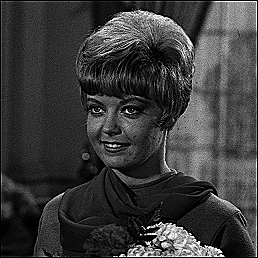

In [6]:
cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))

Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

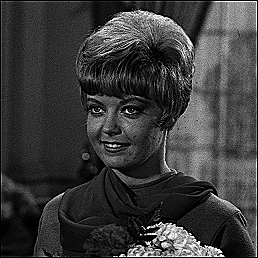

In [7]:
# Sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))

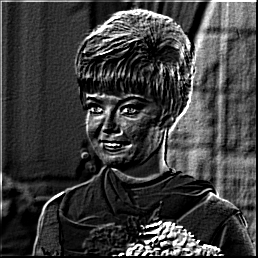

In [8]:
# Emboss
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

cv2_imshow(convolution2d(img_gray,kernel_emboss,1,2))

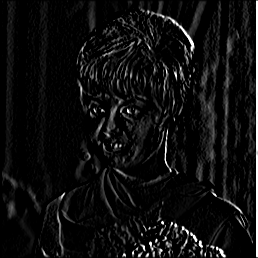

In [9]:
# Left Sobel Edge Detection
kernel_leftsobel = np.array([[1,0,-1],
                             [2,0,-2],
                             [1,0,-1]])

cv2_imshow(convolution2d(img_gray,kernel_leftsobel,1,2))

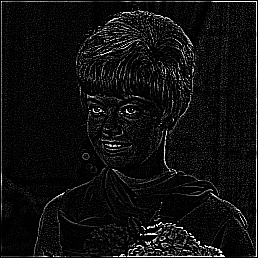

In [10]:
# Canny Edge Detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

cv2_imshow(convolution2d(img_gray,kernel_canny,1,2))

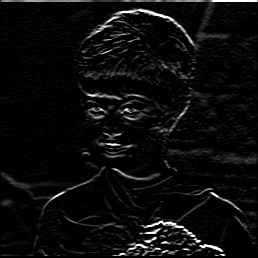

In [11]:
# Prewitt Edge Detection
kernel_prewitt= np.array([[-1, -1, -1],
                             [0, 0, 0],
                             [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

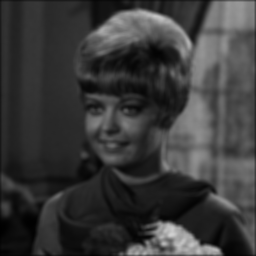

In [12]:
# 5x5 Gaussian Blur
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gauss= gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, kernel_gauss, 1, 2))


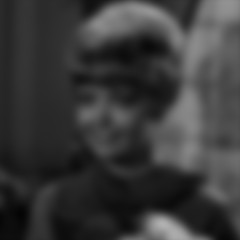

In [13]:
# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))


# Tugas

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

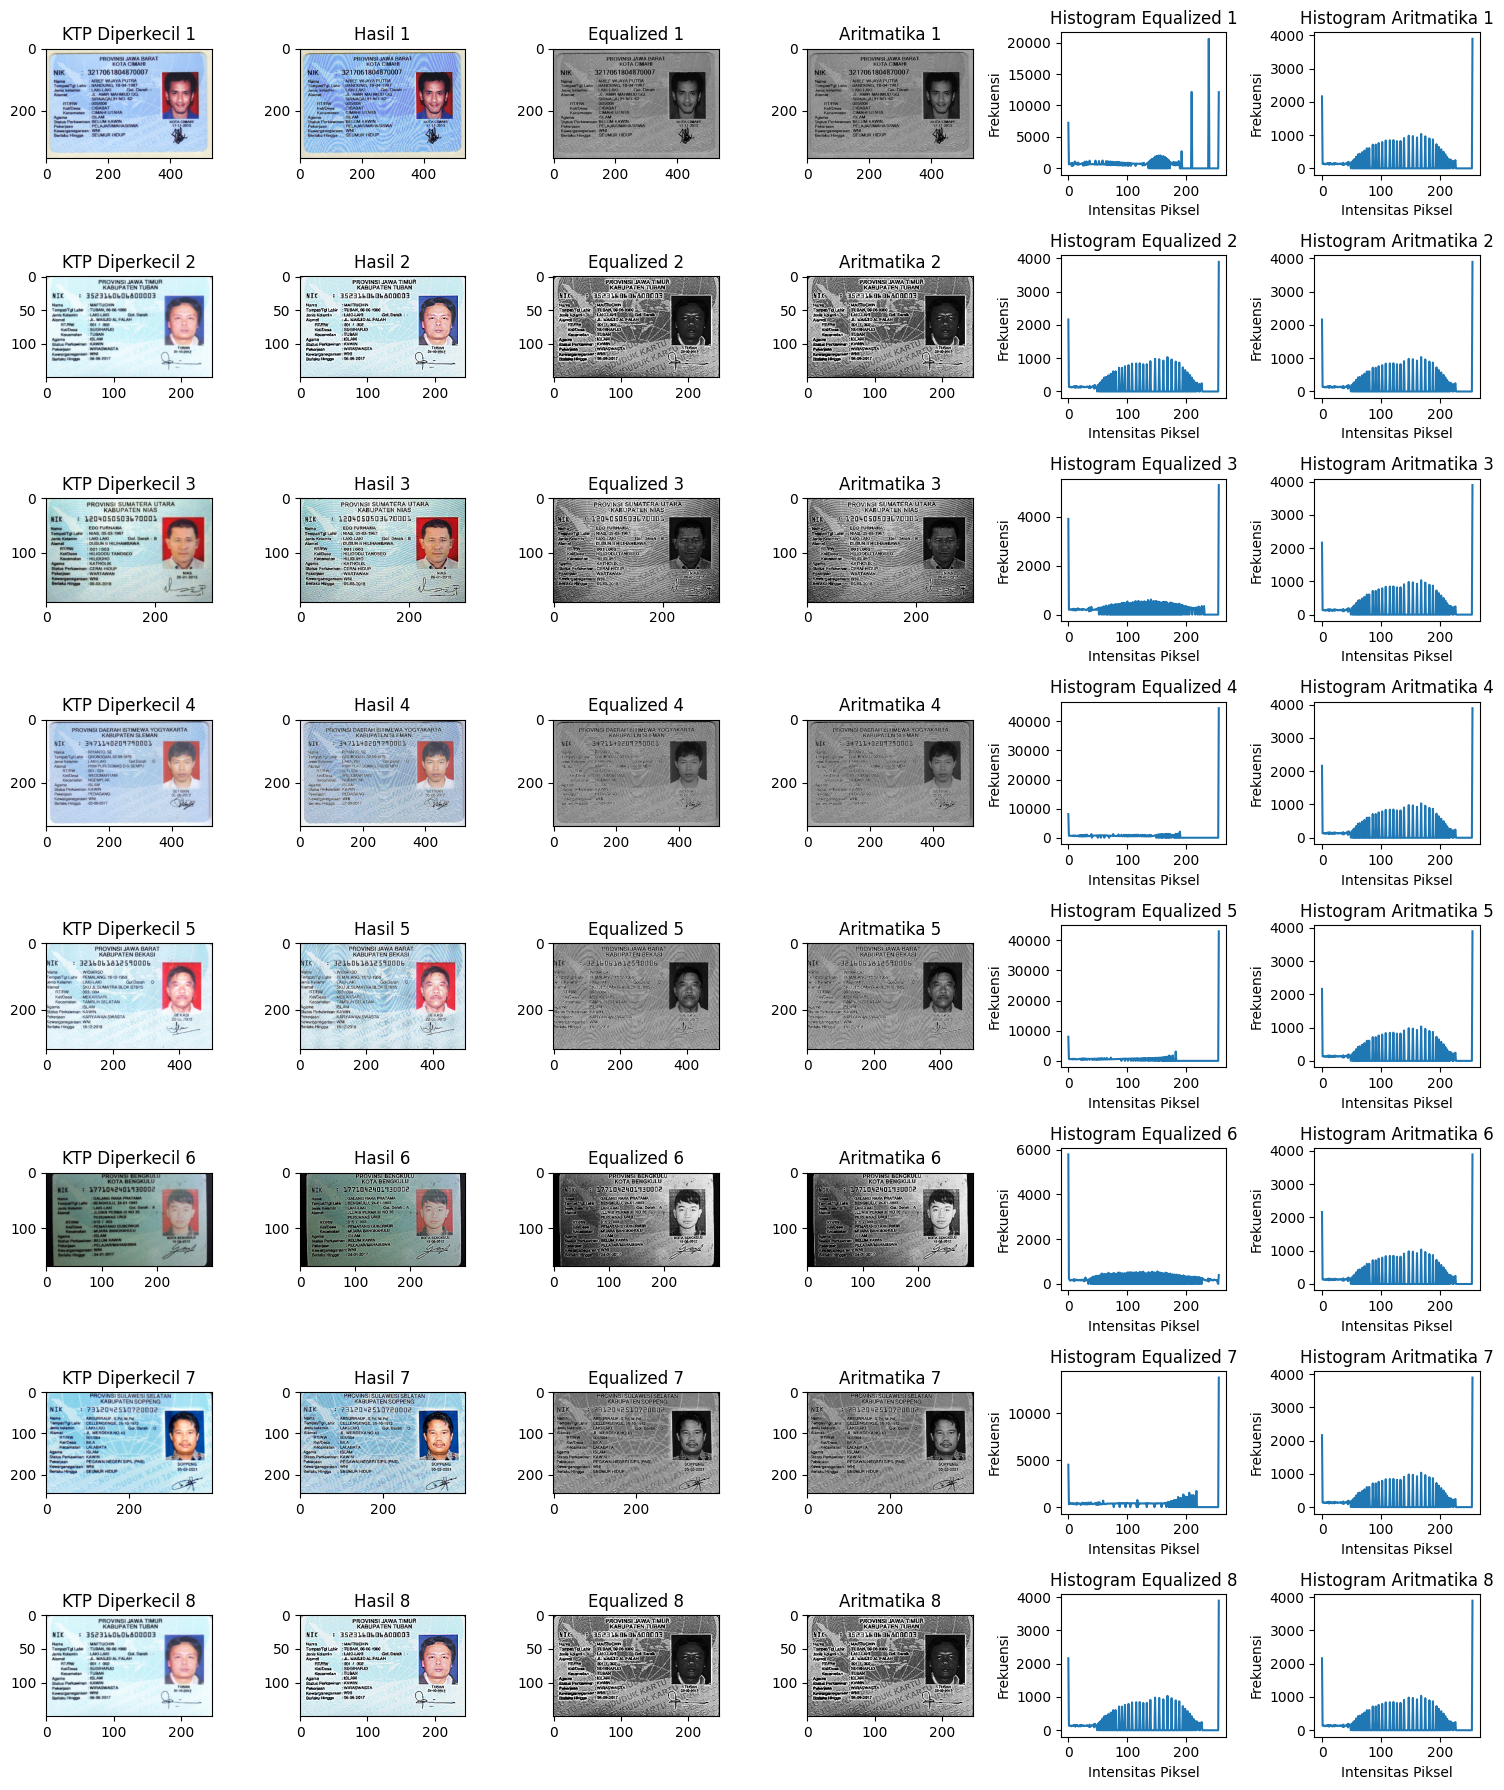

In [53]:

import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

folder_path = '/content/drive/MyDrive/dataset KTP/KTP_More/'

# Dapatkan daftar file citra dalam folder
ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Fungsi untuk penyesuaian kecerahan
def Brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv2.merge((h, s, v))
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Kernel untuk mengasah gambar
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])


# Buat grid untuk menampilkan gambar
num_rows = len(ktp_files)
num_cols = 6
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Iterasi melalui gambar-gambar KTP
for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv2.imread(ktp_path)

    # Ubah ukuran gambar KTP
    ktp_image_resized = cv2.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)

    # Terapkan penyesuaian Brightness
    brightness_adjusted = Brightness(ktp_image_resized, -10)

    # Terapkan Sharpen
    result = cv2.filter2D(brightness_adjusted, -1, kernel_sharpen)

    # Lakukan histogram equalization
    result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    result_equalized = cv2.equalizeHist(result_gray)
    result_equalized_color = cv2.cvtColor(result_equalized, cv2.COLOR_GRAY2BGR)

    # Lakukan histogram equalization pada hasil operasi aritmatika
    result_arithmatic_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    result_arithmatic = cv2.equalizeHist(result_arithmatic_gray)
    result_arithmatic_color = cv2.cvtColor(result_arithmatic, cv2.COLOR_GRAY2BGR)

    # Tampilkan gambar asli dengan label
    axs[i, 0].imshow(cv2.cvtColor(ktp_image_resized, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP Diperkecil {i+1}')

    # Tampilkan gambar yang telah diolah dengan label
    axs[i, 1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB,))
    axs[i, 1].set_title(f'Hasil {i+1}')

    # Tampilkan gambar hasil equalisasi dengan label
    axs[i, 2].imshow(cv2.cvtColor(result_equalized_color, cv2.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized {i+1}')

    # Tampilkan gambar hasil operasi aritmatika setelah histogram equalization
    axs[i, 3].imshow(cv2.cvtColor(result_arithmatic_color, cv2.COLOR_BGR2RGB))
    axs[i, 3].set_title(f'Aritmatika {i+1}')

    # Hitung histogram gambar hasil equalisasi
    hist_equalized = cv2.calcHist([result_equalized], [0], None, [256], [0, 256])

    # Hitung histogram gambar aritmatika
    hist_arithmatic_equalized = cv2.calcHist([result_arithmatic], [0], None, [256], [0, 256])

    # Tampilkan histogram pada kolom ke-4 dengan label
    axs[i, 4].plot(hist_equalized)
    axs[i, 4].set_title(f'Histogram Equalized {i+1}')
    axs[i, 4].set_xlabel('Intensitas Piksel')
    axs[i, 4].set_ylabel('Frekuensi')

    # Tampilkan histogram dari operasi aritmatika setelah histogram equalization pada kolom ke-5
    axs[i, 5].plot(hist_arithmatic_equalized)
    axs[i, 5].set_title(f'Histogram Aritmatika {i+1}')
    axs[i, 5].set_xlabel('Intensitas Piksel')
    axs[i, 5].set_ylabel('Frekuensi')

# Tampilkan hasil keseluruhan
plt.tight_layout()
plt.show()